<a href="https://colab.research.google.com/github/anomara1/BTGP/blob/main/Audio_specific_dis_fun_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr

# Load a clean speech signal
clean_signal, sr = librosa.load(librosa.example('trumpet'), sr=None, duration=5)  # Replace with your speech file

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize a dictionary to store results
results = {
    'LSD': [],
    'PESQ': [],  # Requires external PESQ implementation (e.g., pypesq)
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(len(X)) * np.abs(X)) / np.sum(np.abs(X))
    centroid_Y = np.sum(np.arange(len(Y)) * np.abs(Y)) / np.sum(np.abs(Y))
    return np.abs(centroid_X - centroid_Y)

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    f, Pxx = stft(X)
    f, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(Pxx**2, axis=0) * np.mean(Pyy**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(cepstrum) / np.mean(cepstrum)
    return hnr

# Add noise and compute metrics
for noise_level in noise_levels:
    # Add noise to the clean signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(clean_signal))
    noisy_signal = clean_signal + noise

    # Compute metrics
    results['LSD'].append(log_spectral_distance(np.abs(librosa.stft(clean_signal)), np.abs(librosa.stft(noisy_signal))))
    results['MCD'].append(mel_cepstral_distortion(clean_signal, noisy_signal))
    results['SegSNR'].append(segmental_snr(clean_signal, noisy_signal))
    results['SFM'].append(spectral_flatness_measure(noisy_signal))
    results['Spectral Centroid Distance'].append(spectral_centroid_distance(np.abs(librosa.stft(clean_signal)), np.abs(librosa.stft(noisy_signal))))
    results['Spectral Coherence'].append(spectral_coherence(clean_signal, noisy_signal))
    results['HNR'].append(harmonic_to_noise_ratio(noisy_signal))

# Plot results
plt.figure(figsize=(12, 8))
for metric, values in results.items():
    plt.plot(noise_levels, values, label=metric)

plt.xlabel('Noise Level (dB)')
plt.ylabel('Metric Value')
plt.title('Comparison of Audio Distance Metrics at Different Noise Levels')
plt.legend()
plt.grid()
plt.show()

ValueError: operands could not be broadcast together with shapes (1025,) (1025,216) 

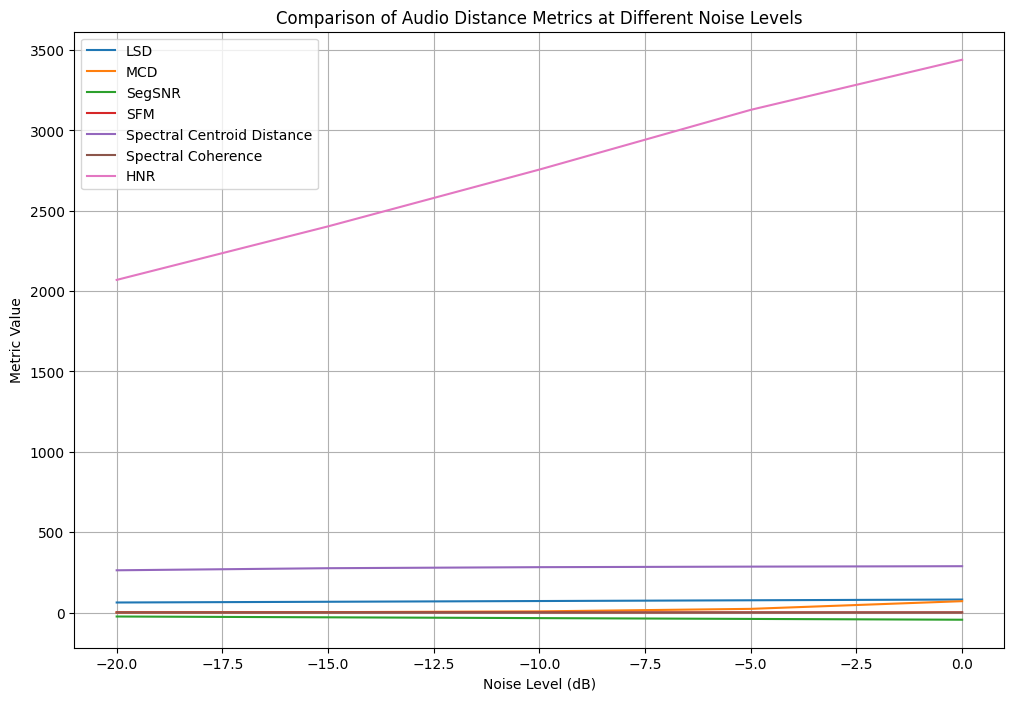

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.stats import pearsonr

# Load a clean speech signal
clean_signal, sr = librosa.load(librosa.example('trumpet'), sr=None, duration=5)  # Replace with your speech file

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize a dictionary to store results
results = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Add noise and compute metrics
for noise_level in noise_levels:
    # Add noise to the clean signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(clean_signal))
    noisy_signal = clean_signal + noise

    # Compute STFTs
    clean_stft = np.abs(librosa.stft(clean_signal))
    noisy_stft = np.abs(librosa.stft(noisy_signal))

    # Compute metrics
    results['LSD'].append(log_spectral_distance(clean_stft, noisy_stft))
    results['MCD'].append(mel_cepstral_distortion(clean_signal, noisy_signal))
    results['SegSNR'].append(segmental_snr(clean_signal, noisy_signal))
    results['SFM'].append(spectral_flatness_measure(noisy_signal))
    results['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft, noisy_stft))
    results['Spectral Coherence'].append(spectral_coherence(clean_signal, noisy_signal))
    results['HNR'].append(harmonic_to_noise_ratio(noisy_signal))

# Plot results
plt.figure(figsize=(12, 8))
for metric, values in results.items():
    plt.plot(noise_levels, values, label=metric)

plt.xlabel('Noise Level (dB)')
plt.ylabel('Metric Value')
plt.title('Comparison of Audio Distance Metrics at Different Noise Levels')
plt.legend()
plt.grid()
plt.show()

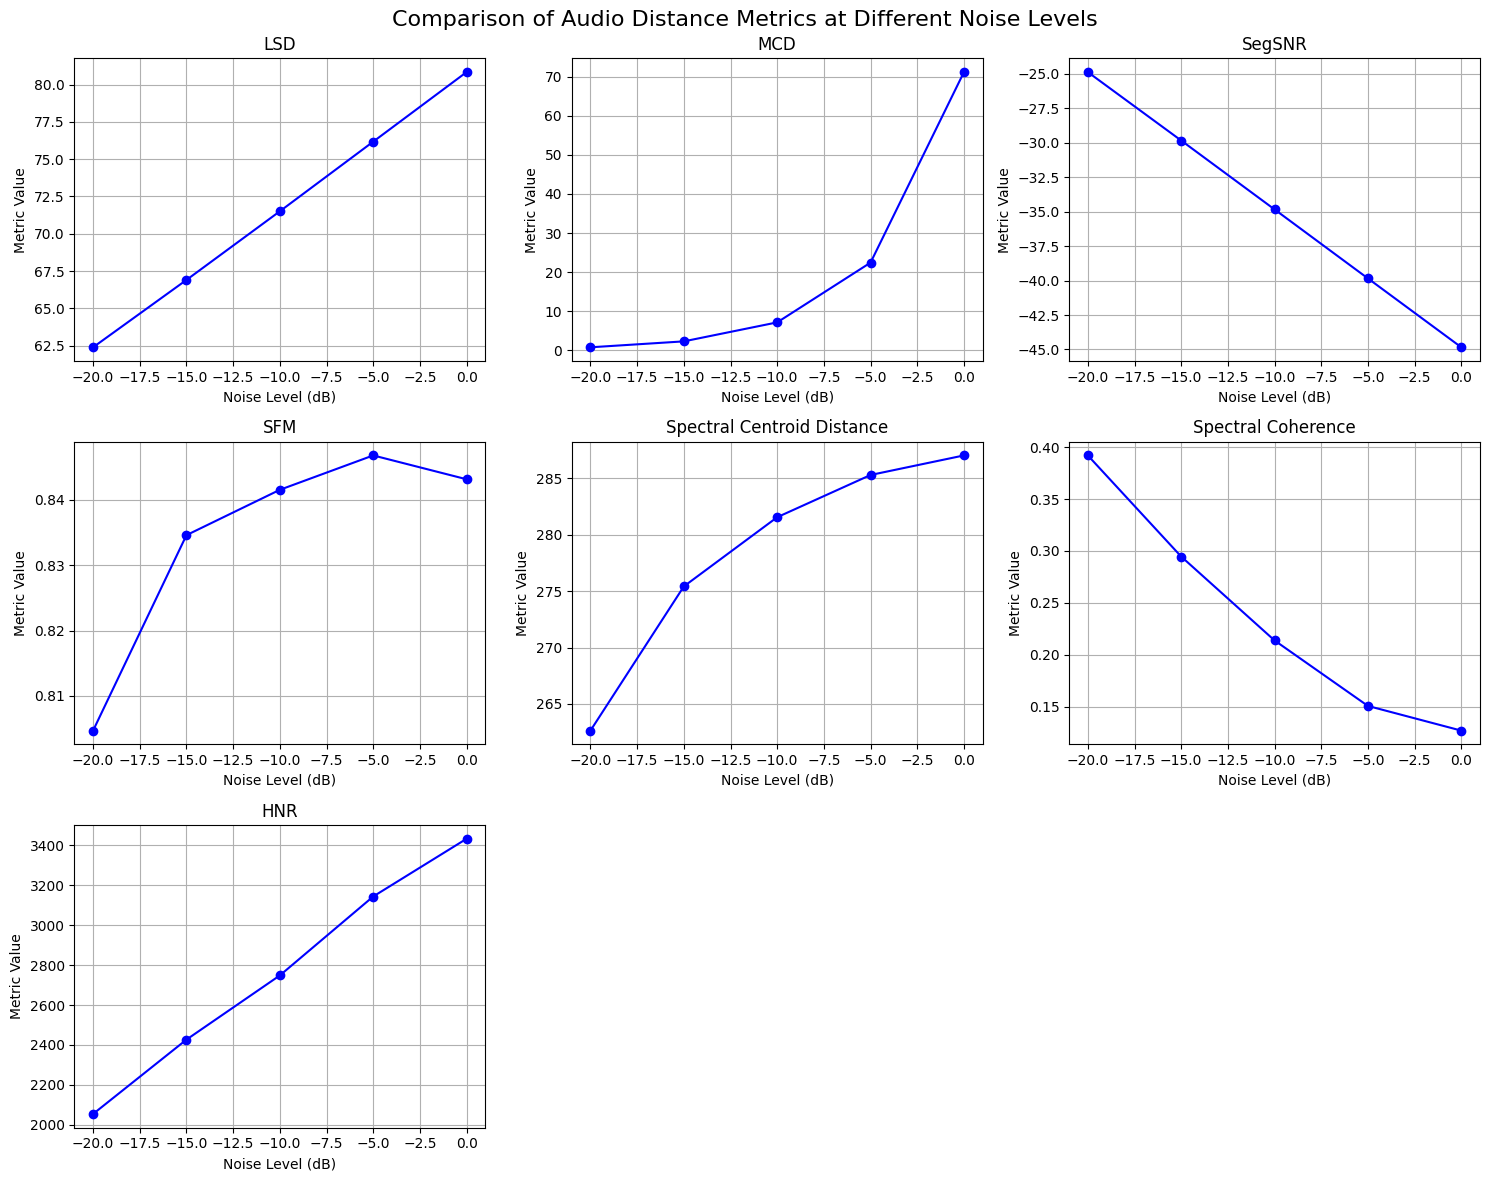

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.stats import pearsonr

# Load a clean speech signal
clean_signal, sr = librosa.load(librosa.example('trumpet'), sr=None, duration=5)  # Replace with your speech file

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize a dictionary to store results
results = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Add noise and compute metrics
for noise_level in noise_levels:
    # Add noise to the clean signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(clean_signal))
    noisy_signal = clean_signal + noise

    # Compute STFTs
    clean_stft = np.abs(librosa.stft(clean_signal))
    noisy_stft = np.abs(librosa.stft(noisy_signal))

    # Compute metrics
    results['LSD'].append(log_spectral_distance(clean_stft, noisy_stft))
    results['MCD'].append(mel_cepstral_distortion(clean_signal, noisy_signal))
    results['SegSNR'].append(segmental_snr(clean_signal, noisy_signal))
    results['SFM'].append(spectral_flatness_measure(noisy_signal))
    results['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft, noisy_stft))
    results['Spectral Coherence'].append(spectral_coherence(clean_signal, noisy_signal))
    results['HNR'].append(harmonic_to_noise_ratio(noisy_signal))

# Create subplots for each metric
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid of subplots
fig.suptitle('Comparison of Audio Distance Metrics at Different Noise Levels', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, (metric, values) in enumerate(results.items()):
    axes[i].plot(noise_levels, values, marker='o', linestyle='-', color='b')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Noise Level (dB)')
    axes[i].set_ylabel('Metric Value')
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(len(results), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

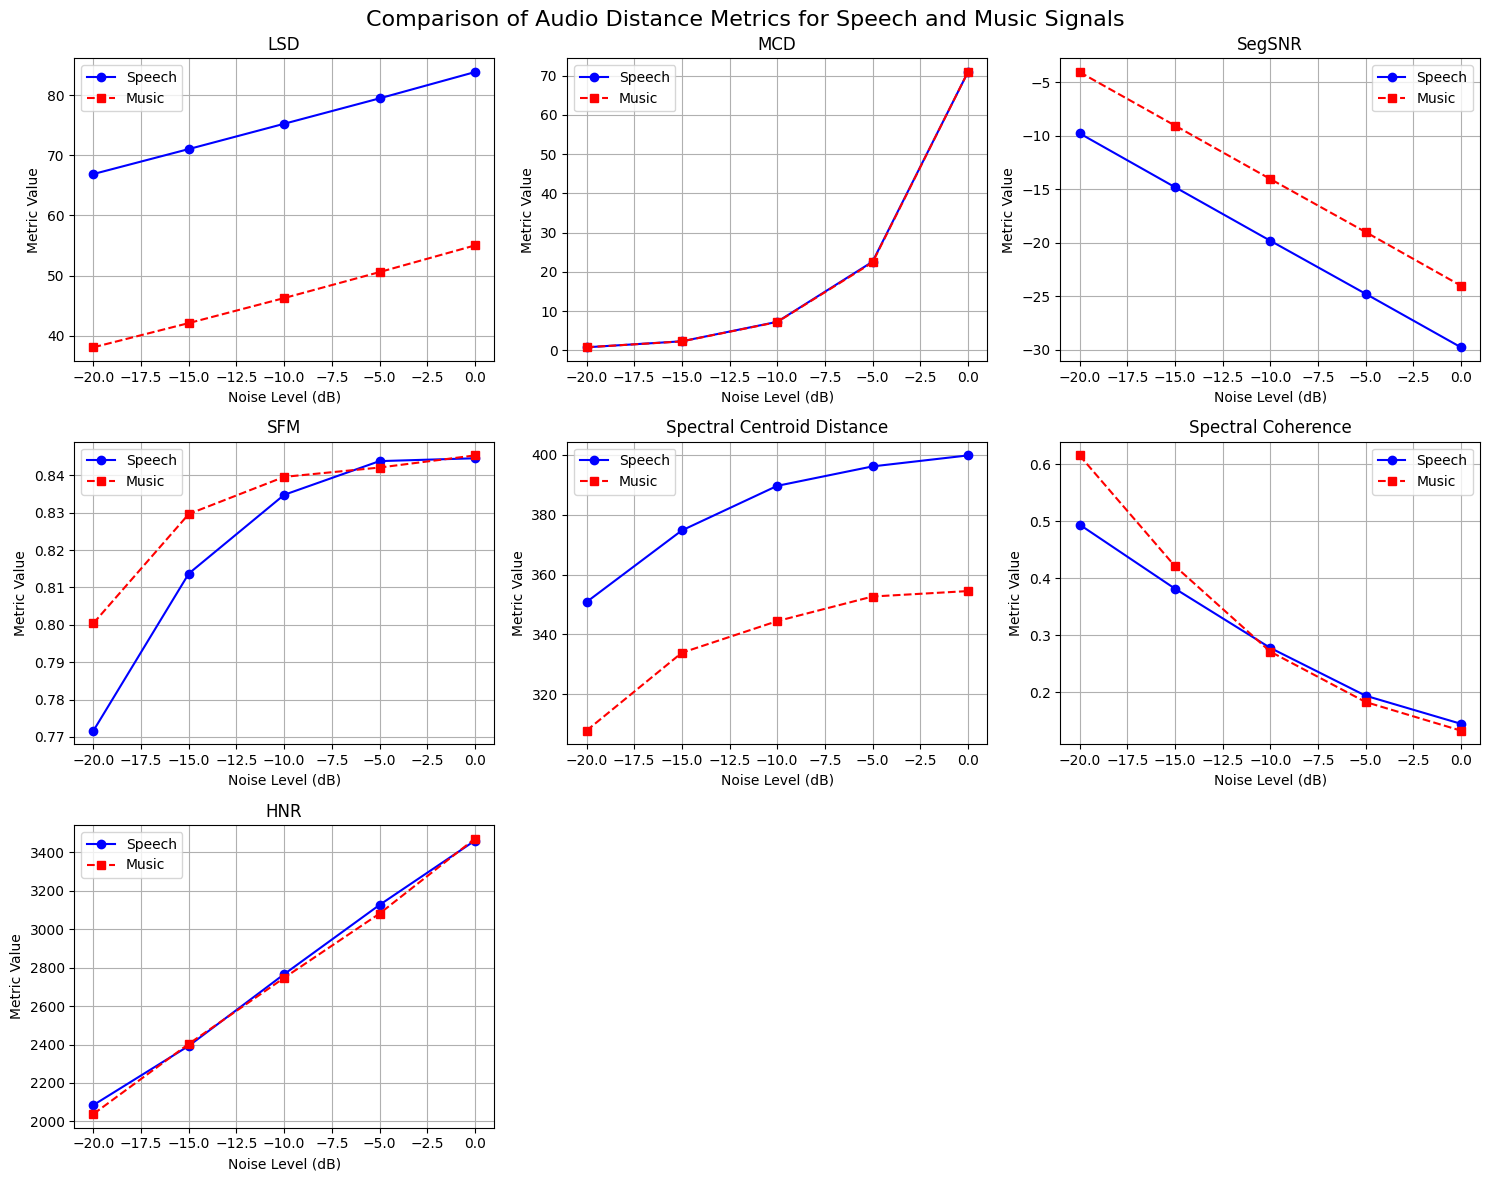

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.stats import pearsonr

# Load a clean speech signal
speech_signal, sr_speech = librosa.load(librosa.example('libri1'), sr=None, duration=5)  # Replace with your speech file

# Load a music signal
music_signal, sr_music = librosa.load(librosa.example('brahms'), sr=None, duration=5)  # Replace with your music file

# Resample music signal to match speech signal's sample rate
if sr_speech != sr_music:
    music_signal = librosa.resample(music_signal, orig_sr=sr_music, target_sr=sr_speech)

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize dictionaries to store results for speech and music
results_speech = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

results_music = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr_speech, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr_speech, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Add noise and compute metrics for speech signal
for noise_level in noise_levels:
    # Add noise to the speech signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(speech_signal))
    noisy_speech = speech_signal + noise

    # Compute STFTs
    clean_stft_speech = np.abs(librosa.stft(speech_signal))
    noisy_stft_speech = np.abs(librosa.stft(noisy_speech))

    # Compute metrics for speech
    results_speech['LSD'].append(log_spectral_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['MCD'].append(mel_cepstral_distortion(speech_signal, noisy_speech))
    results_speech['SegSNR'].append(segmental_snr(speech_signal, noisy_speech))
    results_speech['SFM'].append(spectral_flatness_measure(noisy_speech))
    results_speech['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Spectral Coherence'].append(spectral_coherence(speech_signal, noisy_speech))
    results_speech['HNR'].append(harmonic_to_noise_ratio(noisy_speech))

# Add noise and compute metrics for music signal
for noise_level in noise_levels:
    # Add noise to the music signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(music_signal))
    noisy_music = music_signal + noise

    # Compute STFTs
    clean_stft_music = np.abs(librosa.stft(music_signal))
    noisy_stft_music = np.abs(librosa.stft(noisy_music))

    # Compute metrics for music
    results_music['LSD'].append(log_spectral_distance(clean_stft_music, noisy_stft_music))
    results_music['MCD'].append(mel_cepstral_distortion(music_signal, noisy_music))
    results_music['SegSNR'].append(segmental_snr(music_signal, noisy_music))
    results_music['SFM'].append(spectral_flatness_measure(noisy_music))
    results_music['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_music, noisy_stft_music))
    results_music['Spectral Coherence'].append(spectral_coherence(music_signal, noisy_music))
    results_music['HNR'].append(harmonic_to_noise_ratio(noisy_music))

# Create subplots for each metric
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid of subplots
fig.suptitle('Comparison of Audio Distance Metrics for Speech and Music Signals', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, (metric, _) in enumerate(results_speech.items()):
    axes[i].plot(noise_levels, results_speech[metric], marker='o', linestyle='-', color='b', label='Speech')
    axes[i].plot(noise_levels, results_music[metric], marker='s', linestyle='--', color='r', label='Music')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Noise Level (dB)')
    axes[i].set_ylabel('Metric Value')
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(len(results_speech), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft
import requests
import io

# Load a clean speech signal
speech_signal, sr_speech = librosa.load(librosa.example('libri1'), sr=None, duration=5)  # Replace with your speech file

# Load a music signal
music_signal, sr_music = librosa.load(librosa.example('brahms'), sr=None, duration=5)  # Replace with your music file

# Download an environmental sound file from the internet
def download_environmental_sound(url):
    response = requests.get(url)
    response.raise_for_status()  # Check for errors
    return io.BytesIO(response.content)

# URL of an environmental sound file (e.g., from Freesound)
environmental_sound_url = "https://freesound.org/data/previews/612/612102_1648170-lq.mp3"  # Example URL

# Download and load the environmental sound
environmental_sound_file = download_environmental_sound(environmental_sound_url)
environmental_signal, sr_env = librosa.load(environmental_sound_file, sr=None, duration=5)

# Resample signals to match the speech signal's sample rate
if sr_speech != sr_music:
    music_signal = librosa.resample(music_signal, orig_sr=sr_music, target_sr=sr_speech)
if sr_speech != sr_env:
    environmental_signal = librosa.resample(environmental_signal, orig_sr=sr_env, target_sr=sr_speech)

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize dictionaries to store results for speech, music, and environmental sounds
results_speech = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

results_music = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

results_env = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr_speech, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr_speech, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Add noise and compute metrics for speech signal
for noise_level in noise_levels:
    # Add noise to the speech signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(speech_signal))
    noisy_speech = speech_signal + noise

    # Compute STFTs
    clean_stft_speech = np.abs(librosa.stft(speech_signal))
    noisy_stft_speech = np.abs(librosa.stft(noisy_speech))

    # Compute metrics for speech
    results_speech['LSD'].append(log_spectral_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['MCD'].append(mel_cepstral_distortion(speech_signal, noisy_speech))
    results_speech['SegSNR'].append(segmental_snr(speech_signal, noisy_speech))
    results_speech['SFM'].append(spectral_flatness_measure(noisy_speech))
    results_speech['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Spectral Coherence'].append(spectral_coherence(speech_signal, noisy_speech))
    results_speech['HNR'].append(harmonic_to_noise_ratio(noisy_speech))

# Add noise and compute metrics for music signal
for noise_level in noise_levels:
    # Add noise to the music signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(music_signal))
    noisy_music = music_signal + noise

    # Compute STFTs
    clean_stft_music = np.abs(librosa.stft(music_signal))
    noisy_stft_music = np.abs(librosa.stft(noisy_music))

    # Compute metrics for music
    results_music['LSD'].append(log_spectral_distance(clean_stft_music, noisy_stft_music))
    results_music['MCD'].append(mel_cepstral_distortion(music_signal, noisy_music))
    results_music['SegSNR'].append(segmental_snr(music_signal, noisy_music))
    results_music['SFM'].append(spectral_flatness_measure(noisy_music))
    results_music['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_music, noisy_stft_music))
    results_music['Spectral Coherence'].append(spectral_coherence(music_signal, noisy_music))
    results_music['HNR'].append(harmonic_to_noise_ratio(noisy_music))

# Add noise and compute metrics for environmental sound
for noise_level in noise_levels:
    # Add noise to the environmental sound
    noise = np.random.normal(0, 10**(noise_level / 20), len(environmental_signal))
    noisy_env = environmental_signal + noise

    # Compute STFTs
    clean_stft_env = np.abs(librosa.stft(environmental_signal))
    noisy_stft_env = np.abs(librosa.stft(noisy_env))

    # Compute metrics for environmental sound
    results_env['LSD'].append(log_spectral_distance(clean_stft_env, noisy_stft_env))
    results_env['MCD'].append(mel_cepstral_distortion(environmental_signal, noisy_env))
    results_env['SegSNR'].append(segmental_snr(environmental_signal, noisy_env))
    results_env['SFM'].append(spectral_flatness_measure(noisy_env))
    results_env['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_env, noisy_stft_env))
    results_env['Spectral Coherence'].append(spectral_coherence(environmental_signal, noisy_env))
    results_env['HNR'].append(harmonic_to_noise_ratio(noisy_env))

# Create subplots for each metric
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid of subplots
fig.suptitle('Comparison of Audio Distance Metrics for Speech, Music, and Environmental Sounds', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, (metric, _) in enumerate(results_speech.items()):
    axes[i].plot(noise_levels, results_speech[metric], marker='o', linestyle='-', color='b', label='Speech')
    axes[i].plot(noise_levels, results_music[metric], marker='s', linestyle='--', color='r', label='Music')
    axes[i].plot(noise_levels, results_env[metric], marker='^', linestyle=':', color='g', label='Environmental')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Noise Level (dB)')
    axes[i].set_ylabel('Metric Value')
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(len(results_speech), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

HTTPError: 404 Client Error: Not Found for url: https://cdn.freesound.org/previews/612/612102_1648170-lq.mp3

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.stats import pearsonr

# Load a clean speech signal
speech_signal, sr_speech = librosa.load(librosa.example('libri1'), sr=None, duration=5)  # Replace with your speech file

# Load a music signal
music_signal, sr_music = librosa.load(librosa.example('brahms'), sr=None, duration=5)  # Replace with your music file

# Load an environmental sound (e.g., rain, wind, traffic)
# Replace 'environmental_sound.wav' with your environmental sound file
environmental_signal, sr_env = librosa.load('environmental_sound.wav', sr=None, duration=5)

# Resample signals to match the speech signal's sample rate
if sr_speech != sr_music:
    music_signal = librosa.resample(music_signal, orig_sr=sr_music, target_sr=sr_speech)
if sr_speech != sr_env:
    environmental_signal = librosa.resample(environmental_signal, orig_sr=sr_env, target_sr=sr_speech)

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize dictionaries to store results for speech, music, and environmental sounds
results_speech = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

results_music = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

results_env = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr_speech, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr_speech, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Add noise and compute metrics for speech signal
for noise_level in noise_levels:
    # Add noise to the speech signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(speech_signal))
    noisy_speech = speech_signal + noise

    # Compute STFTs
    clean_stft_speech = np.abs(librosa.stft(speech_signal))
    noisy_stft_speech = np.abs(librosa.stft(noisy_speech))

    # Compute metrics for speech
    results_speech['LSD'].append(log_spectral_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['MCD'].append(mel_cepstral_distortion(speech_signal, noisy_speech))
    results_speech['SegSNR'].append(segmental_snr(speech_signal, noisy_speech))
    results_speech['SFM'].append(spectral_flatness_measure(noisy_speech))
    results_speech['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Spectral Coherence'].append(spectral_coherence(speech_signal, noisy_speech))
    results_speech['HNR'].append(harmonic_to_noise_ratio(noisy_speech))

# Add noise and compute metrics for music signal
for noise_level in noise_levels:
    # Add noise to the music signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(music_signal))
    noisy_music = music_signal + noise

    # Compute STFTs
    clean_stft_music = np.abs(librosa.stft(music_signal))
    noisy_stft_music = np.abs(librosa.stft(noisy_music))

    # Compute metrics for music
    results_music['LSD'].append(log_spectral_distance(clean_stft_music, noisy_stft_music))
    results_music['MCD'].append(mel_cepstral_distortion(music_signal, noisy_music))
    results_music['SegSNR'].append(segmental_snr(music_signal, noisy_music))
    results_music['SFM'].append(spectral_flatness_measure(noisy_music))
    results_music['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_music, noisy_stft_music))
    results_music['Spectral Coherence'].append(spectral_coherence(music_signal, noisy_music))
    results_music['HNR'].append(harmonic_to_noise_ratio(noisy_music))

# Add noise and compute metrics for environmental sound
for noise_level in noise_levels:
    # Add noise to the environmental sound
    noise = np.random.normal(0, 10**(noise_level / 20), len(environmental_signal))
    noisy_env = environmental_signal + noise

    # Compute STFTs
    clean_stft_env = np.abs(librosa.stft(environmental_signal))
    noisy_stft_env = np.abs(librosa.stft(noisy_env))

    # Compute metrics for environmental sound
    results_env['LSD'].append(log_spectral_distance(clean_stft_env, noisy_stft_env))
    results_env['MCD'].append(mel_cepstral_distortion(environmental_signal, noisy_env))
    results_env['SegSNR'].append(segmental_snr(environmental_signal, noisy_env))
    results_env['SFM'].append(spectral_flatness_measure(noisy_env))
    results_env['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_env, noisy_stft_env))
    results_env['Spectral Coherence'].append(spectral_coherence(environmental_signal, noisy_env))
    results_env['HNR'].append(harmonic_to_noise_ratio(noisy_env))

# Create subplots for each metric
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid of subplots
fig.suptitle('Comparison of Audio Distance Metrics for Speech, Music, and Environmental Sounds', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, (metric, _) in enumerate(results_speech.items()):
    axes[i].plot(noise_levels, results_speech[metric], marker='o', linestyle='-', color='b', label='Speech')
    axes[i].plot(noise_levels, results_music[metric], marker='s', linestyle='--', color='r', label='Music')
    axes[i].plot(noise_levels, results_env[metric], marker='^', linestyle=':', color='g', label='Environmental')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Noise Level (dB)')
    axes[i].set_ylabel('Metric Value')
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(len(results_speech), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<ipython-input-2-5662ffc5a9cb>:15: UserWarning: PySoundFile failed. Trying audioread instead.
  environmental_signal, sr_env = librosa.load('environmental_sound.wav', sr=None, duration=5)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'environmental_sound.wav'

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft
import requests
import io

# Load a clean speech signal
speech_signal, sr_speech = librosa.load(librosa.example('libri1'), sr=None, duration=5)  # Replace with your speech file

# Load a music signal
music_signal, sr_music = librosa.load(librosa.example('brahms'), sr=None, duration=5)  # Replace with your music file

# Download an environmental sound file from the internet
def download_environmental_sound(url):
    response = requests.get(url)
    response.raise_for_status()  # Check for errors
    return io.BytesIO(response.content)

# URL of an environmental sound file (e.g., from Freesound)
environmental_sound_url = "https://freesound.org/data/previews/612/612102_1648170-lq.mp3"  # Example URL

# Download and load the environmental sound
environmental_sound_file = download_environmental_sound(environmental_sound_url)
environmental_signal, sr_env = librosa.load(environmental_sound_file, sr=None, duration=5)

# Resample signals to match the speech signal's sample rate
if sr_speech != sr_music:
    music_signal = librosa.resample(music_signal, orig_sr=sr_music, target_sr=sr_speech)
if sr_speech != sr_env:
    environmental_signal = librosa.resample(environmental_signal, orig_sr=sr_env, target_sr=sr_speech)

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize dictionaries to store results for speech, music, and environmental sounds
results_speech = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

results_music = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

results_env = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr_speech, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr_speech, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Add noise and compute metrics for speech signal
for noise_level in noise_levels:
    # Add noise to the speech signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(speech_signal))
    noisy_speech = speech_signal + noise

    # Compute STFTs
    clean_stft_speech = np.abs(librosa.stft(speech_signal))
    noisy_stft_speech = np.abs(librosa.stft(noisy_speech))

    # Compute metrics for speech
    results_speech['LSD'].append(log_spectral_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['MCD'].append(mel_cepstral_distortion(speech_signal, noisy_speech))
    results_speech['SegSNR'].append(segmental_snr(speech_signal, noisy_speech))
    results_speech['SFM'].append(spectral_flatness_measure(noisy_speech))
    results_speech['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Spectral Coherence'].append(spectral_coherence(speech_signal, noisy_speech))
    results_speech['HNR'].append(harmonic_to_noise_ratio(noisy_speech))

# Add noise and compute metrics for music signal
for noise_level in noise_levels:
    # Add noise to the music signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(music_signal))
    noisy_music = music_signal + noise

    # Compute STFTs
    clean_stft_music = np.abs(librosa.stft(music_signal))
    noisy_stft_music = np.abs(librosa.stft(noisy_music))

    # Compute metrics for music
    results_music['LSD'].append(log_spectral_distance(clean_stft_music, noisy_stft_music))
    results_music['MCD'].append(mel_cepstral_distortion(music_signal, noisy_music))
    results_music['SegSNR'].append(segmental_snr(music_signal, noisy_music))
    results_music['SFM'].append(spectral_flatness_measure(noisy_music))
    results_music['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_music, noisy_stft_music))
    results_music['Spectral Coherence'].append(spectral_coherence(music_signal, noisy_music))
    results_music['HNR'].append(harmonic_to_noise_ratio(noisy_music))

# Add noise and compute metrics for environmental sound
for noise_level in noise_levels:
    # Add noise to the environmental sound
    noise = np.random.normal(0, 10**(noise_level / 20), len(environmental_signal))
    noisy_env = environmental_signal + noise

    # Compute STFTs
    clean_stft_env = np.abs(librosa.stft(environmental_signal))
    noisy_stft_env = np.abs(librosa.stft(noisy_env))

    # Compute metrics for environmental sound
    results_env['LSD'].append(log_spectral_distance(clean_stft_env, noisy_stft_env))
    results_env['MCD'].append(mel_cepstral_distortion(environmental_signal, noisy_env))
    results_env['SegSNR'].append(segmental_snr(environmental_signal, noisy_env))
    results_env['SFM'].append(spectral_flatness_measure(noisy_env))
    results_env['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_env, noisy_stft_env))
    results_env['Spectral Coherence'].append(spectral_coherence(environmental_signal, noisy_env))
    results_env['HNR'].append(harmonic_to_noise_ratio(noisy_env))

# Create subplots for each metric
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid of subplots
fig.suptitle('Comparison of Audio Distance Metrics for Speech, Music, and Environmental Sounds', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, (metric, _) in enumerate(results_speech.items()):
    axes[i].plot(noise_levels, results_speech[metric], marker='o', linestyle='-', color='b', label='Speech')
    axes[i].plot(noise_levels, results_music[metric], marker='s', linestyle='--', color='r', label='Music')
    axes[i].plot(noise_levels, results_env[metric], marker='^', linestyle=':', color='g', label='Environmental')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Noise Level (dB)')
    axes[i].set_ylabel('Metric Value')
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(len(results_speech), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

HTTPError: 404 Client Error: Not Found for url: https://cdn.freesound.org/previews/612/612102_1648170-lq.mp3

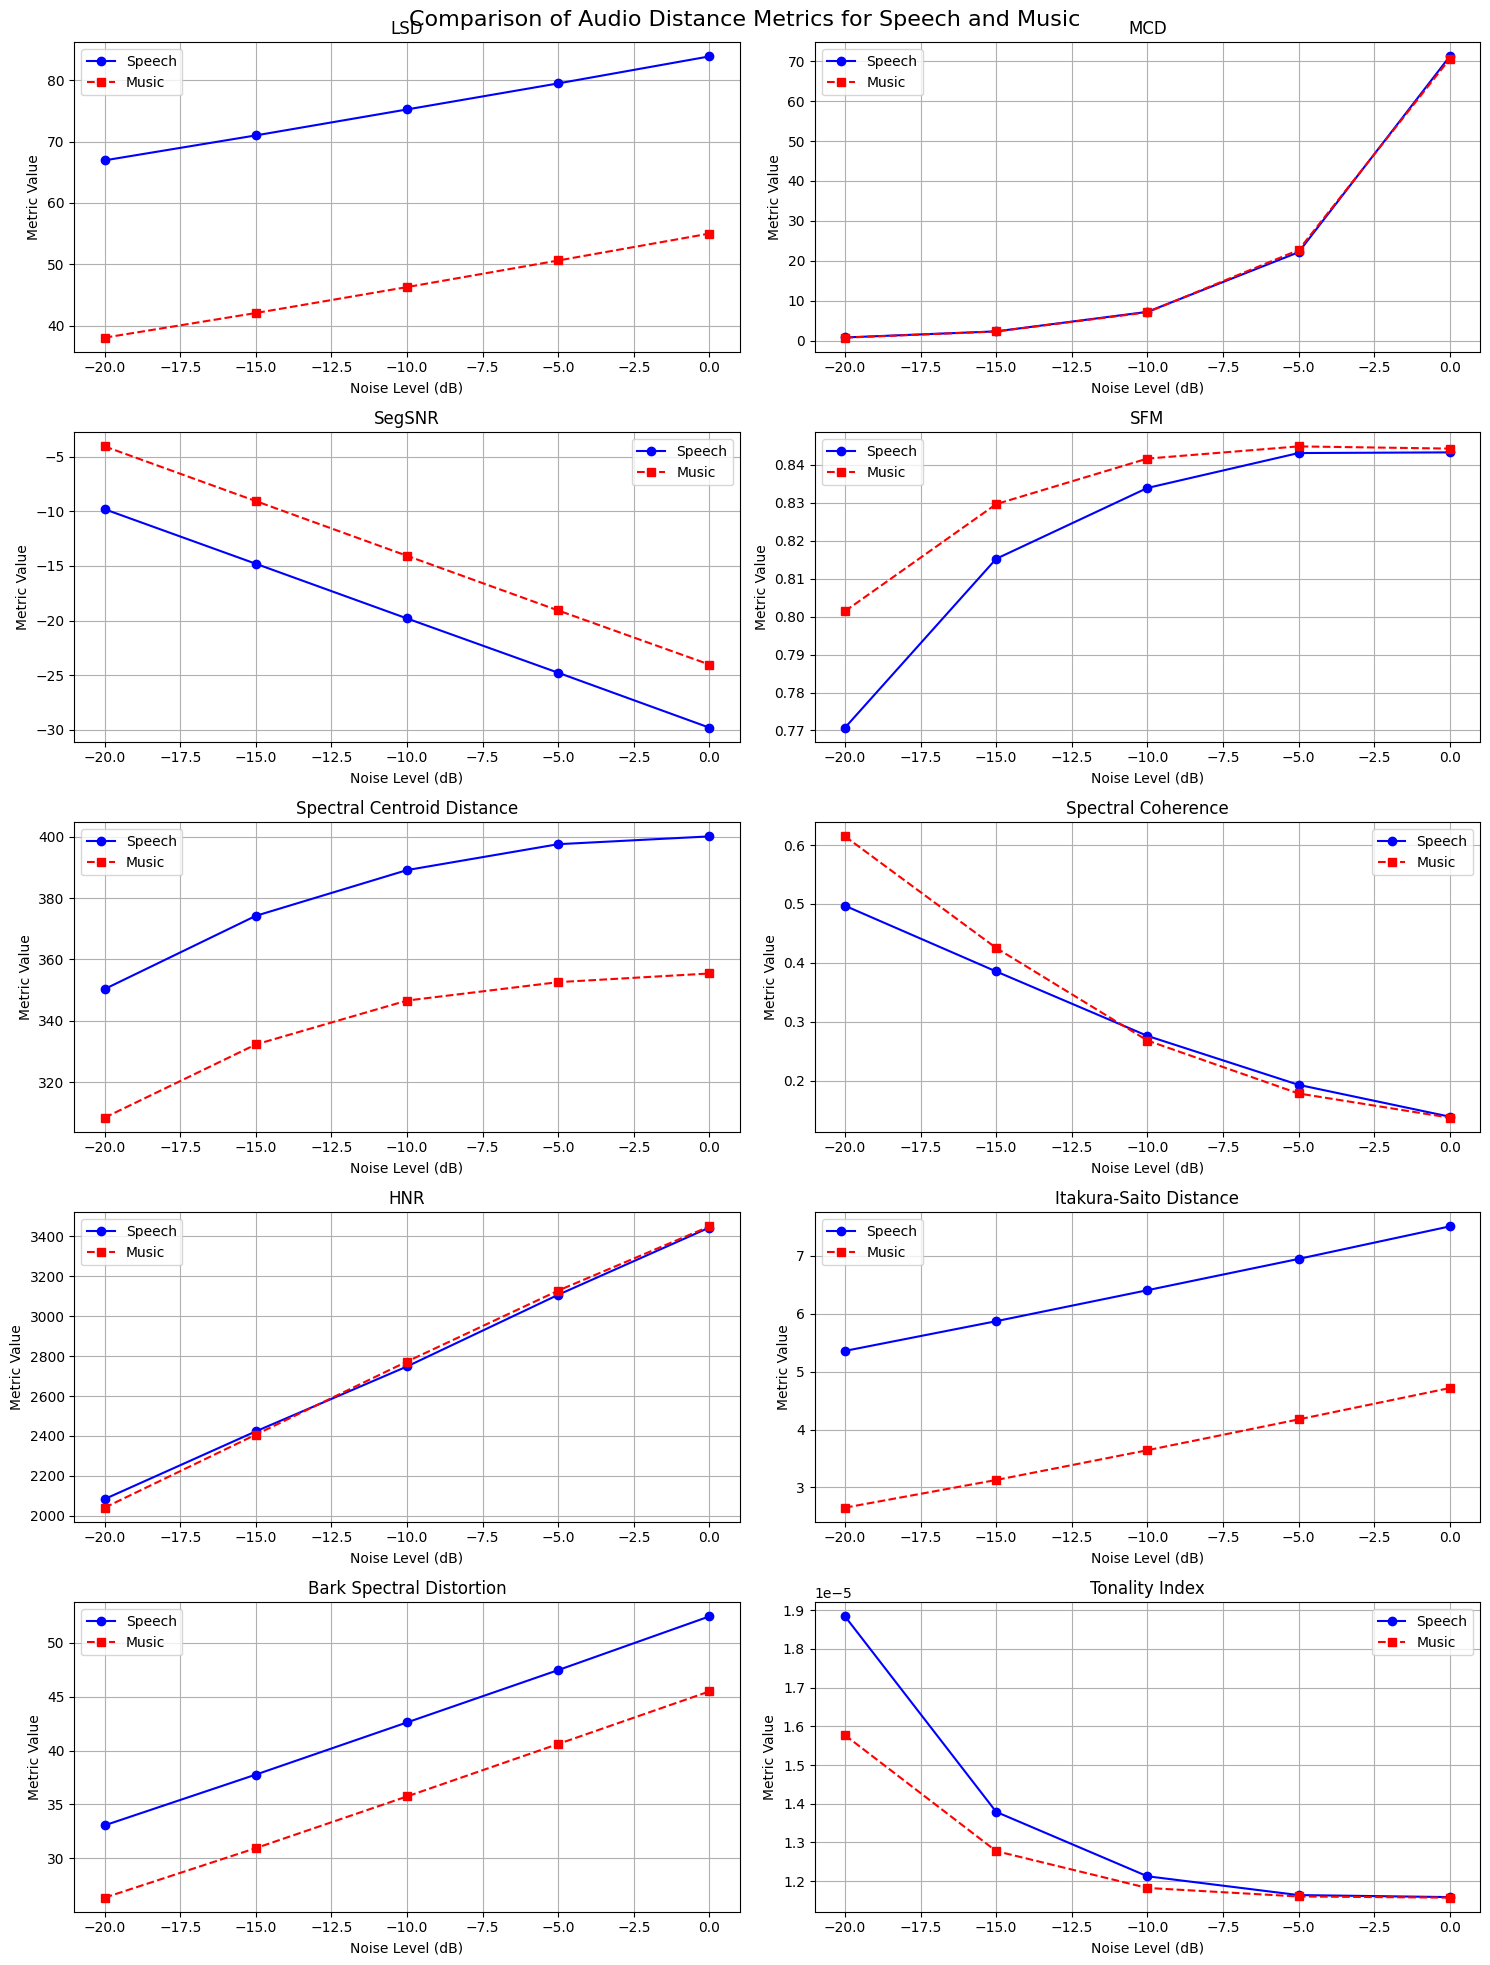

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft

# Load a clean speech signal
speech_signal, sr_speech = librosa.load(librosa.example('libri1'), sr=None, duration=5)  # Replace with your speech file

# Load a music signal
music_signal, sr_music = librosa.load(librosa.example('brahms'), sr=None, duration=5)  # Replace with your music file

# Resample music signal to match speech signal's sample rate
if sr_speech != sr_music:
    music_signal = librosa.resample(music_signal, orig_sr=sr_music, target_sr=sr_speech)

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize dictionaries to store results for speech and music
results_speech = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': [],
    'Itakura-Saito Distance': [],
    'Bark Spectral Distortion': [],
    'Tonality Index': []
}

results_music = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': [],
    'Itakura-Saito Distance': [],
    'Bark Spectral Distortion': [],
    'Tonality Index': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr_speech, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr_speech, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Function to compute Itakura-Saito Distance
def itakura_saito_distance(X, Y):
    return np.mean((X / Y) - np.log(X / Y) - 1)

# Function to compute Bark Spectral Distortion (BSD)
def bark_spectral_distortion(X, Y):
    X_bark = librosa.amplitude_to_db(X)
    Y_bark = librosa.amplitude_to_db(Y)
    return np.mean(np.abs(X_bark - Y_bark))

# Function to compute Tonality Index
def tonality_index(signal):
    spectrum = np.abs(np.fft.fft(signal))
    tonal = np.sum(spectrum**2) / np.sum(spectrum)**2
    return tonal

# Add noise and compute metrics for speech signal
for noise_level in noise_levels:
    # Add noise to the speech signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(speech_signal))
    noisy_speech = speech_signal + noise

    # Compute STFTs
    clean_stft_speech = np.abs(librosa.stft(speech_signal))
    noisy_stft_speech = np.abs(librosa.stft(noisy_speech))

    # Compute metrics for speech
    results_speech['LSD'].append(log_spectral_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['MCD'].append(mel_cepstral_distortion(speech_signal, noisy_speech))
    results_speech['SegSNR'].append(segmental_snr(speech_signal, noisy_speech))
    results_speech['SFM'].append(spectral_flatness_measure(noisy_speech))
    results_speech['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Spectral Coherence'].append(spectral_coherence(speech_signal, noisy_speech))
    results_speech['HNR'].append(harmonic_to_noise_ratio(noisy_speech))
    results_speech['Itakura-Saito Distance'].append(itakura_saito_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Bark Spectral Distortion'].append(bark_spectral_distortion(clean_stft_speech, noisy_stft_speech))
    results_speech['Tonality Index'].append(tonality_index(noisy_speech))

# Add noise and compute metrics for music signal
for noise_level in noise_levels:
    # Add noise to the music signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(music_signal))
    noisy_music = music_signal + noise

    # Compute STFTs
    clean_stft_music = np.abs(librosa.stft(music_signal))
    noisy_stft_music = np.abs(librosa.stft(noisy_music))

    # Compute metrics for music
    results_music['LSD'].append(log_spectral_distance(clean_stft_music, noisy_stft_music))
    results_music['MCD'].append(mel_cepstral_distortion(music_signal, noisy_music))
    results_music['SegSNR'].append(segmental_snr(music_signal, noisy_music))
    results_music['SFM'].append(spectral_flatness_measure(noisy_music))
    results_music['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_music, noisy_stft_music))
    results_music['Spectral Coherence'].append(spectral_coherence(music_signal, noisy_music))
    results_music['HNR'].append(harmonic_to_noise_ratio(noisy_music))
    results_music['Itakura-Saito Distance'].append(itakura_saito_distance(clean_stft_music, noisy_stft_music))
    results_music['Bark Spectral Distortion'].append(bark_spectral_distortion(clean_stft_music, noisy_stft_music))
    results_music['Tonality Index'].append(tonality_index(noisy_music))

# Create subplots for each metric
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 5x2 grid of subplots
fig.suptitle('Comparison of Audio Distance Metrics for Speech and Music', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, (metric, _) in enumerate(results_speech.items()):
    axes[i].plot(noise_levels, results_speech[metric], marker='o', linestyle='-', color='b', label='Speech')
    axes[i].plot(noise_levels, results_music[metric], marker='s', linestyle='--', color='r', label='Music')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Noise Level (dB)')
    axes[i].set_ylabel('Metric Value')
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(len(results_speech), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

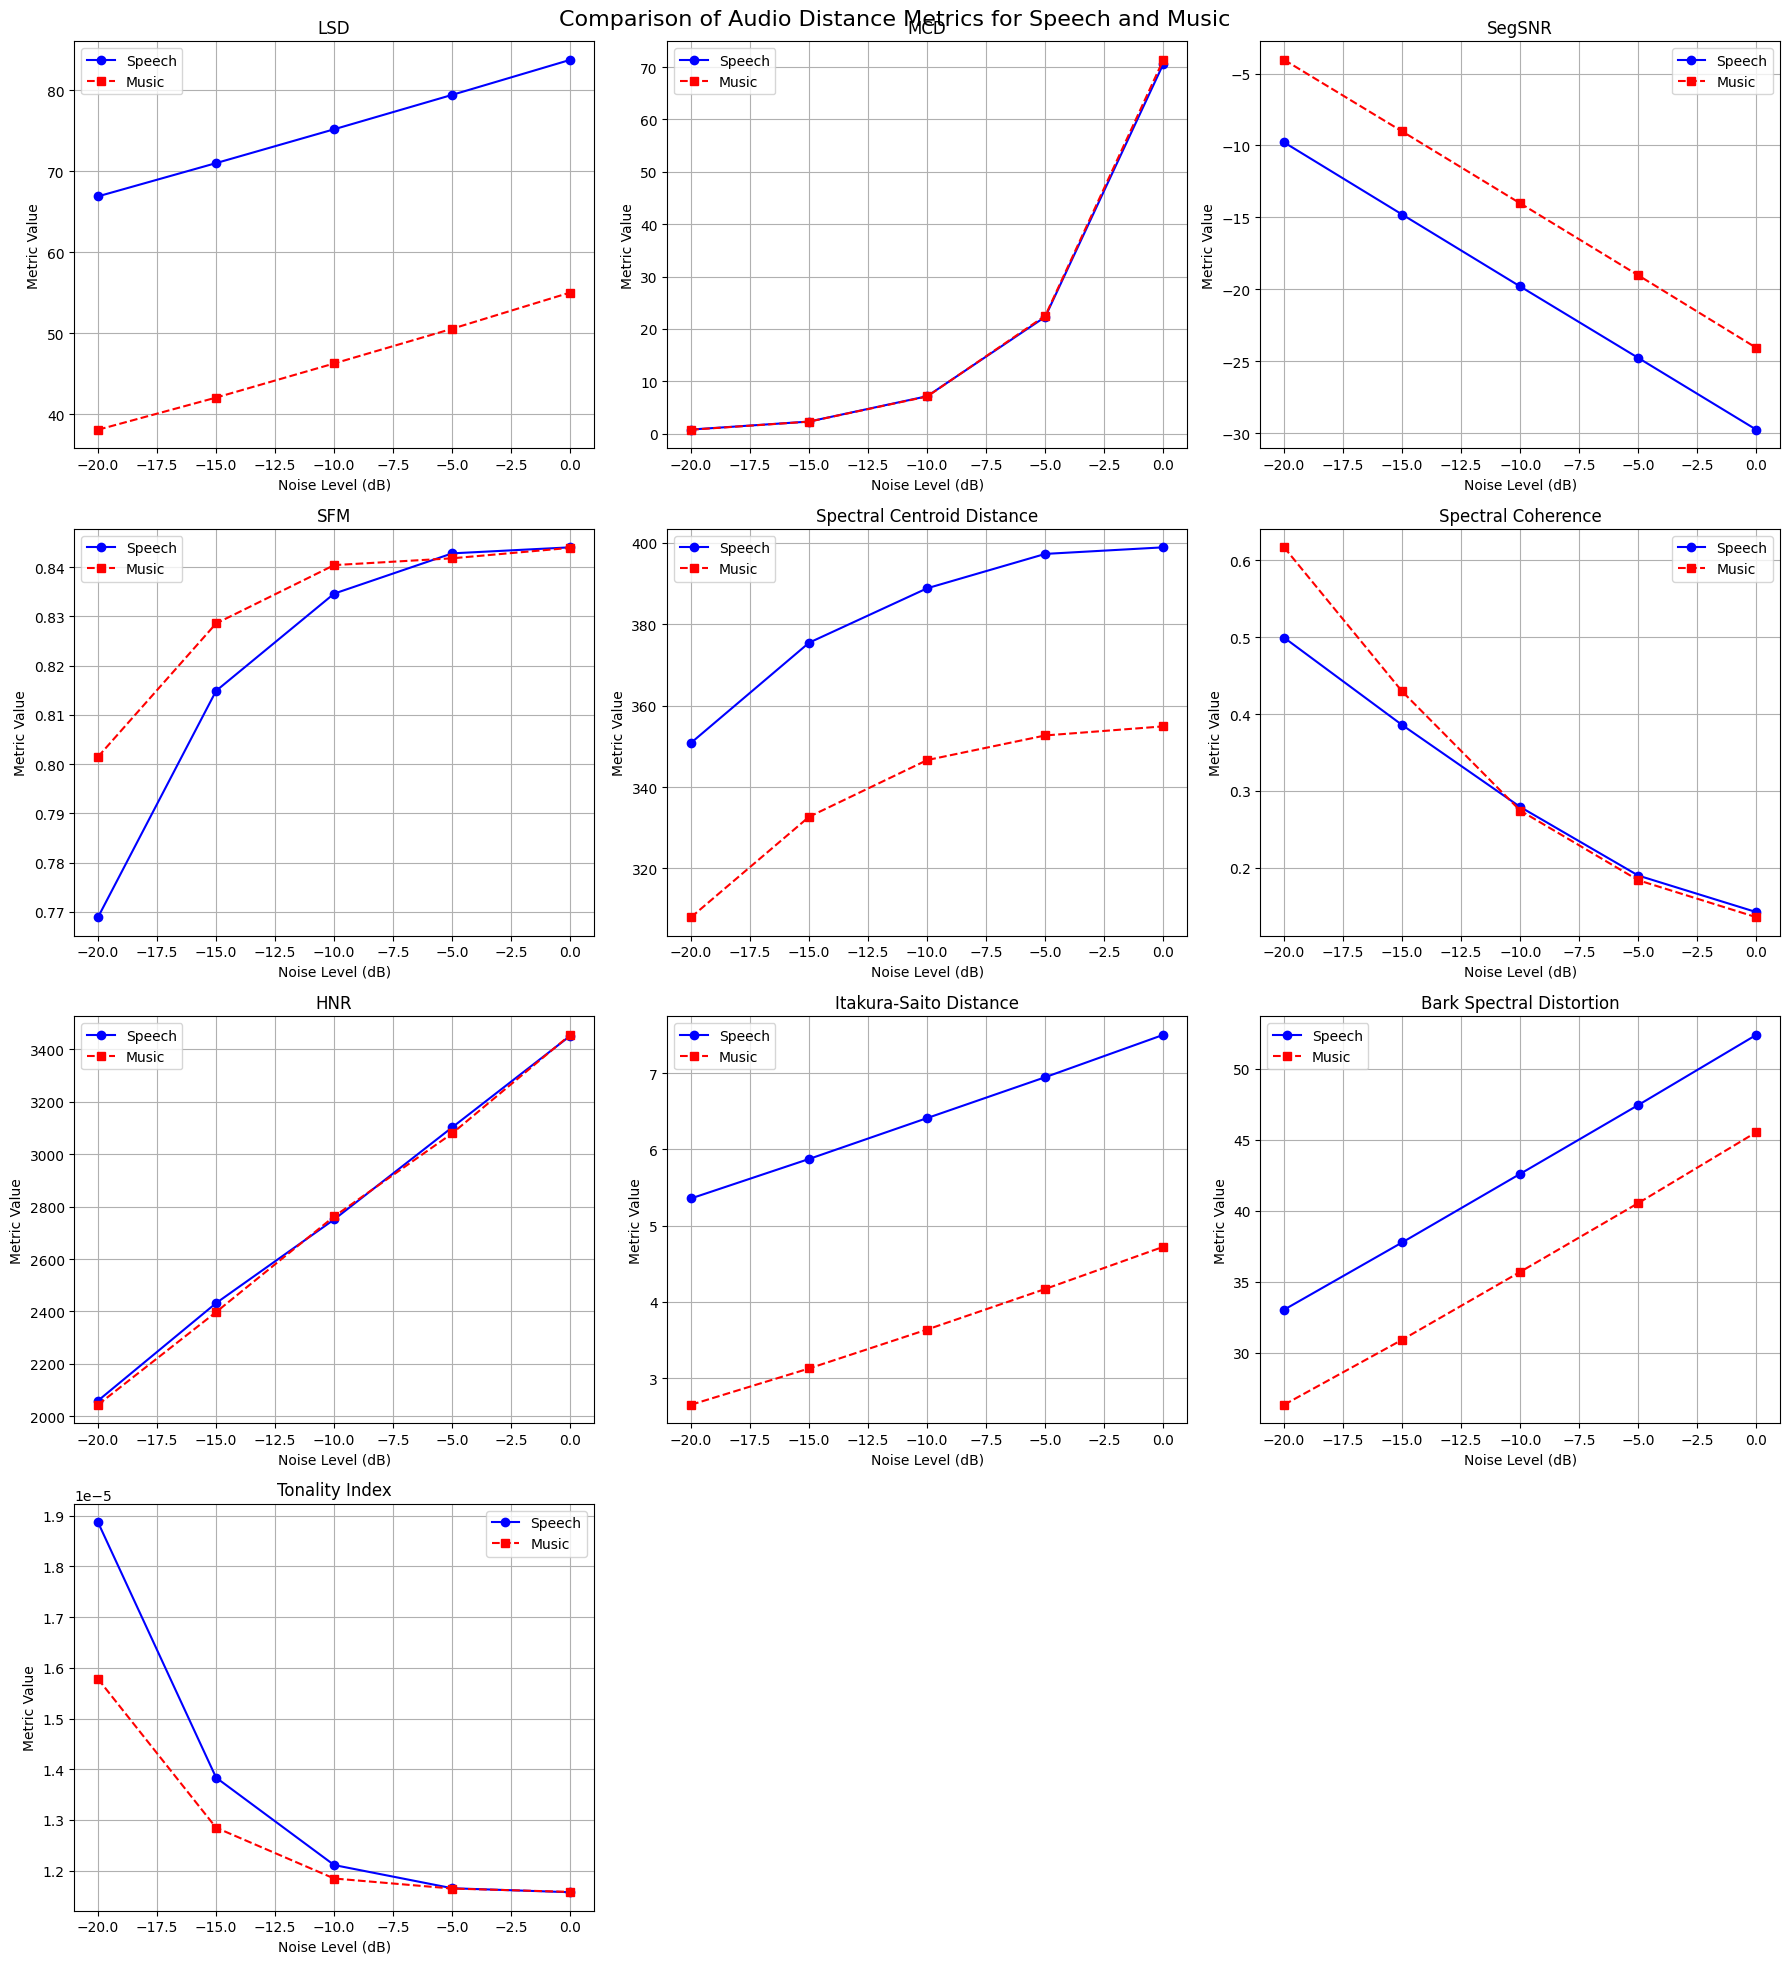

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft

# Load a clean speech signal
speech_signal, sr_speech = librosa.load(librosa.example('libri1'), sr=None, duration=5)  # Replace with your speech file

# Load a music signal
music_signal, sr_music = librosa.load(librosa.example('brahms'), sr=None, duration=5)  # Replace with your music file

# Resample music signal to match speech signal's sample rate
if sr_speech != sr_music:
    music_signal = librosa.resample(music_signal, orig_sr=sr_music, target_sr=sr_speech)

# Define noise levels (in dB)
noise_levels = np.arange(-20, 1, 5)  # From -20 dB to 0 dB in steps of 5 dB

# Initialize dictionaries to store results for speech and music
results_speech = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': [],
    'Itakura-Saito Distance': [],
    'Bark Spectral Distortion': [],
    'Tonality Index': []
}

results_music = {
    'LSD': [],
    'MCD': [],
    'SegSNR': [],
    'SFM': [],
    'Spectral Centroid Distance': [],
    'Spectral Coherence': [],
    'HNR': [],
    'Itakura-Saito Distance': [],
    'Bark Spectral Distortion': [],
    'Tonality Index': []
}

# Function to compute Log Spectral Distance (LSD)
def log_spectral_distance(X, Y):
    return np.sqrt(np.mean((10 * np.log10((X**2) / (Y**2 + 1e-10)))**2))

# Function to compute Mel-Cepstral Distortion (MCD)
def mel_cepstral_distortion(X, Y, n_mels=20):
    X_mel = librosa.feature.melspectrogram(y=X, sr=sr_speech, n_mels=n_mels)
    Y_mel = librosa.feature.melspectrogram(y=Y, sr=sr_speech, n_mels=n_mels)
    return np.mean(np.abs(X_mel - Y_mel))

# Function to compute Segmental Signal-to-Noise Ratio (SegSNR)
def segmental_snr(clean, noisy, frame_size=256, overlap=128):
    snr_segments = []
    for i in range(0, len(clean) - frame_size, frame_size - overlap):
        clean_frame = clean[i:i+frame_size]
        noisy_frame = noisy[i:i+frame_size]
        noise_frame = noisy_frame - clean_frame
        snr = 10 * np.log10(np.sum(clean_frame**2) / (np.sum(noise_frame**2) + 1e-10))
        snr_segments.append(snr)
    return np.mean(snr_segments)

# Function to compute Spectral Flatness Measure (SFM)
def spectral_flatness_measure(signal):
    spectrum = np.abs(np.fft.fft(signal))
    gmean = np.exp(np.mean(np.log(spectrum + 1e-10)))
    amean = np.mean(spectrum)
    return gmean / amean

# Function to compute Spectral Centroid Distance
def spectral_centroid_distance(X, Y):
    centroid_X = np.sum(np.arange(X.shape[0])[:, np.newaxis] * np.abs(X), axis=0) / np.sum(np.abs(X), axis=0)
    centroid_Y = np.sum(np.arange(Y.shape[0])[:, np.newaxis] * np.abs(Y), axis=0) / np.sum(np.abs(Y), axis=0)
    return np.mean(np.abs(centroid_X - centroid_Y))

# Function to compute Spectral Coherence
def spectral_coherence(X, Y):
    _, _, Pxx = stft(X)
    _, _, Pyy = stft(Y)
    Pxy = np.abs(np.mean(Pxx * np.conj(Pyy), axis=0))
    coherence = Pxy / np.sqrt(np.mean(np.abs(Pxx)**2, axis=0) * np.mean(np.abs(Pyy)**2, axis=0))
    return np.mean(coherence)

# Function to compute Harmonic-to-Noise Ratio (HNR)
def harmonic_to_noise_ratio(signal):
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(signal)) + 1e-10))
    hnr = np.max(np.abs(cepstrum)) / np.mean(np.abs(cepstrum))
    return hnr

# Function to compute Itakura-Saito Distance
def itakura_saito_distance(X, Y):
    return np.mean((X / Y) - np.log(X / Y) - 1)

# Function to compute Bark Spectral Distortion (BSD)
def bark_spectral_distortion(X, Y):
    X_bark = librosa.amplitude_to_db(X)
    Y_bark = librosa.amplitude_to_db(Y)
    return np.mean(np.abs(X_bark - Y_bark))

# Function to compute Tonality Index
def tonality_index(signal):
    spectrum = np.abs(np.fft.fft(signal))
    tonal = np.sum(spectrum**2) / np.sum(spectrum)**2
    return tonal

# Add noise and compute metrics for speech signal
for noise_level in noise_levels:
    # Add noise to the speech signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(speech_signal))
    noisy_speech = speech_signal + noise

    # Compute STFTs
    clean_stft_speech = np.abs(librosa.stft(speech_signal))
    noisy_stft_speech = np.abs(librosa.stft(noisy_speech))

    # Compute metrics for speech
    results_speech['LSD'].append(log_spectral_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['MCD'].append(mel_cepstral_distortion(speech_signal, noisy_speech))
    results_speech['SegSNR'].append(segmental_snr(speech_signal, noisy_speech))
    results_speech['SFM'].append(spectral_flatness_measure(noisy_speech))
    results_speech['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Spectral Coherence'].append(spectral_coherence(speech_signal, noisy_speech))
    results_speech['HNR'].append(harmonic_to_noise_ratio(noisy_speech))
    results_speech['Itakura-Saito Distance'].append(itakura_saito_distance(clean_stft_speech, noisy_stft_speech))
    results_speech['Bark Spectral Distortion'].append(bark_spectral_distortion(clean_stft_speech, noisy_stft_speech))
    results_speech['Tonality Index'].append(tonality_index(noisy_speech))

# Add noise and compute metrics for music signal
for noise_level in noise_levels:
    # Add noise to the music signal
    noise = np.random.normal(0, 10**(noise_level / 20), len(music_signal))
    noisy_music = music_signal + noise

    # Compute STFTs
    clean_stft_music = np.abs(librosa.stft(music_signal))
    noisy_stft_music = np.abs(librosa.stft(noisy_music))

    # Compute metrics for music
    results_music['LSD'].append(log_spectral_distance(clean_stft_music, noisy_stft_music))
    results_music['MCD'].append(mel_cepstral_distortion(music_signal, noisy_music))
    results_music['SegSNR'].append(segmental_snr(music_signal, noisy_music))
    results_music['SFM'].append(spectral_flatness_measure(noisy_music))
    results_music['Spectral Centroid Distance'].append(spectral_centroid_distance(clean_stft_music, noisy_stft_music))
    results_music['Spectral Coherence'].append(spectral_coherence(music_signal, noisy_music))
    results_music['HNR'].append(harmonic_to_noise_ratio(noisy_music))
    results_music['Itakura-Saito Distance'].append(itakura_saito_distance(clean_stft_music, noisy_stft_music))
    results_music['Bark Spectral Distortion'].append(bark_spectral_distortion(clean_stft_music, noisy_stft_music))
    results_music['Tonality Index'].append(tonality_index(noisy_music))

# Create subplots for each metric
fig, axes = plt.subplots(4, 3, figsize=(18, 20))  # 4x3 grid of subplots
fig.suptitle('Comparison of Audio Distance Metrics for Speech and Music', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, (metric, _) in enumerate(results_speech.items()):
    axes[i].plot(noise_levels, results_speech[metric], marker='o', linestyle='-', color='b', label='Speech')
    axes[i].plot(noise_levels, results_music[metric], marker='s', linestyle='--', color='r', label='Music')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Noise Level (dB)')
    axes[i].set_ylabel('Metric Value')
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(len(results_speech), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()